In [1]:
# INIT IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import probplot

# Лабораторная работа 2
Визуализация данных

Выполнил: 6131 Чаплыгин Алексей Олегович

0 Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.</br>
Используемый в работе набор данных доступен по следующей ссылке: https://www.kaggle.com/rankirsh/evolution-of-top-games-on-twitch и описывает рейтинг популярных 200 игр, транслируемых на платформе Twitch с 2016 по 2021 года.
В наборе данных содержится таблица с 12 столбцами.</br>
<table border="1">
   <caption>Top games on Twitch 2016 - 2021</caption>
   <tr>
    <th>Номер столбца</th>
    <th>Название столбца</th>
    <th>Описание столбца</th>
   </tr>
   <tr><td>1</td><td>Rank</td><td>Значение рейтинга</td></tr>
   <tr><td>2</td><td>Game</td><td>Наименование игры</td></tr>
   <tr><td>3</td><td>Month</td><td>Месяц</td></tr>
   <tr><td>4</td><td>Year</td><td>Год</td></tr>
   <tr><td>5</td><td>Hours_watched</td><td>Колчествао часов, которое зрители смотрели</td></tr>
   <tr><td>6</td><td>Hours_Streamed</td><td>Количество часов, которое стримеры стримили</td></tr>
   <tr><td>7</td><td>Peak_viewers</td><td>Максимальное количество зрителей</td></tr>
   <tr><td>8</td><td>Peak_channels</td><td>Максимальное количество каналов на которых происходила трансляция одновременно</td></tr>
   <tr><td>9</td><td>Streamers</td><td>Всего стримеров, которые стримили эту игру</td></tr>
   <tr><td>10</td><td>Avg_viewers</td><td>Среднее количество просмотров</td></tr>
   <tr><td>11</td><td>Avg_channels</td><td>Среднее количество каналов</td></tr>
   <tr><td>12</td><td>Avg_viewer_ratio</td><td>Средний коэффициент просмотров</td></tr>
  </table>

In [3]:
data = pd.read_csv('data/Twitch_game_data.csv', sep=',', encoding='windows-1251')

Каждый график необходимо снабдить комментарием

1 Matplotlib</br>
1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab</br>
1.2 Построить несколько суб-графиков на одном графике используя .subplot.</br>
Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом.</br>
Хотя бы в одном графике подпишите оси.</br>
Во всех графиках подписать название графика.</br>


(array([1.4293e+04, 6.0000e+01, 2.0000e+01, 1.1000e+01, 6.0000e+00,
        2.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.9500000e+00, 1.3619420e+03, 2.7219340e+03, 4.0819260e+03,
        5.4419180e+03, 6.8019100e+03, 8.1619020e+03, 9.5218940e+03,
        1.0881886e+04, 1.2241878e+04, 1.3601870e+04]),
 <BarContainer object of 10 artists>)

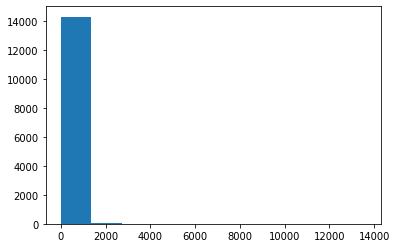

In [4]:
plt.hist(data['Avg_viewer_ratio'])

Text(0, 0.5, 'Years')

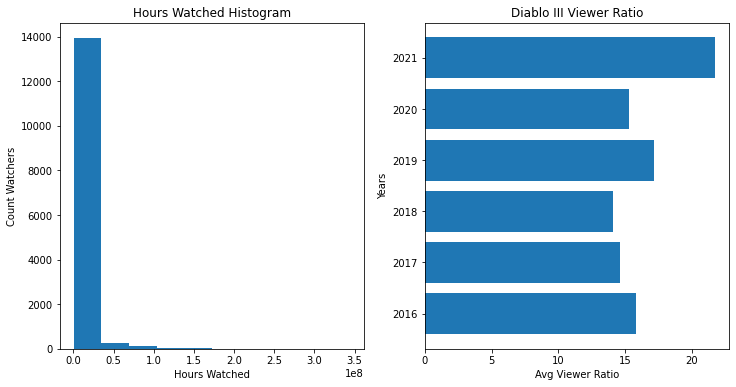

In [5]:
dt_diablo = data.loc[data['Game'] == 'Diablo III']
dt_diabl_years = dt_diablo['Year'].unique()
dt_diabl_ratio =  dt_diablo.groupby(['Year']).mean()
dt_diabl_ratio = dt_diabl_ratio['Avg_viewer_ratio']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(data['Hours_watched'])
ax1.set_title('Hours Watched Histogram')
ax1.set_xlabel('Hours Watched')
ax1.set_ylabel('Count Watchers')
ax2.barh(dt_diabl_years,dt_diabl_ratio)
ax2.set_title('Diablo III Viewer Ratio')
ax2.set_xlabel('Avg Viewer Ratio')
ax2.set_ylabel('Years')

2  На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).
Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

<AxesSubplot:ylabel='Density'>

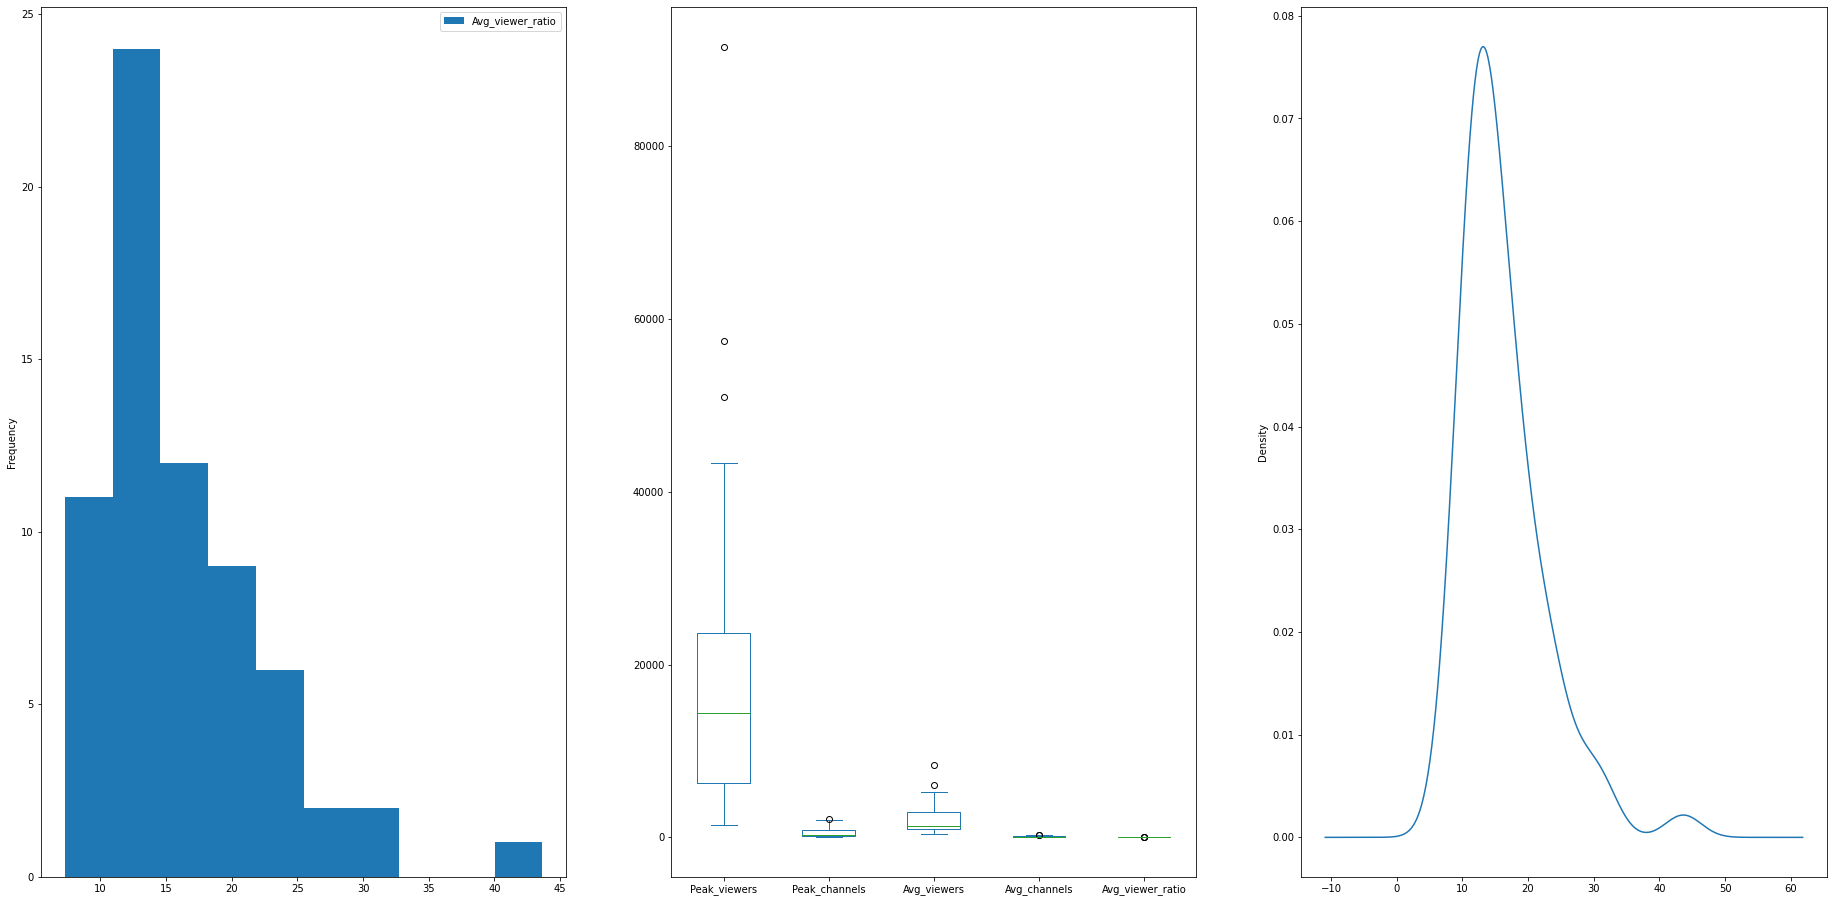

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(32, 16))

dt_diablo.plot(y='Avg_viewer_ratio', kind='hist', ax=ax1)
dt_diablo.fillna(0).plot(y=[1,6,7,9,10,11], kind='box', ax=ax2)
dt_diablo['Avg_viewer_ratio'].plot.kde(y='Avg_viewer_ratio', ax=ax3)

3  Seaborn

3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)


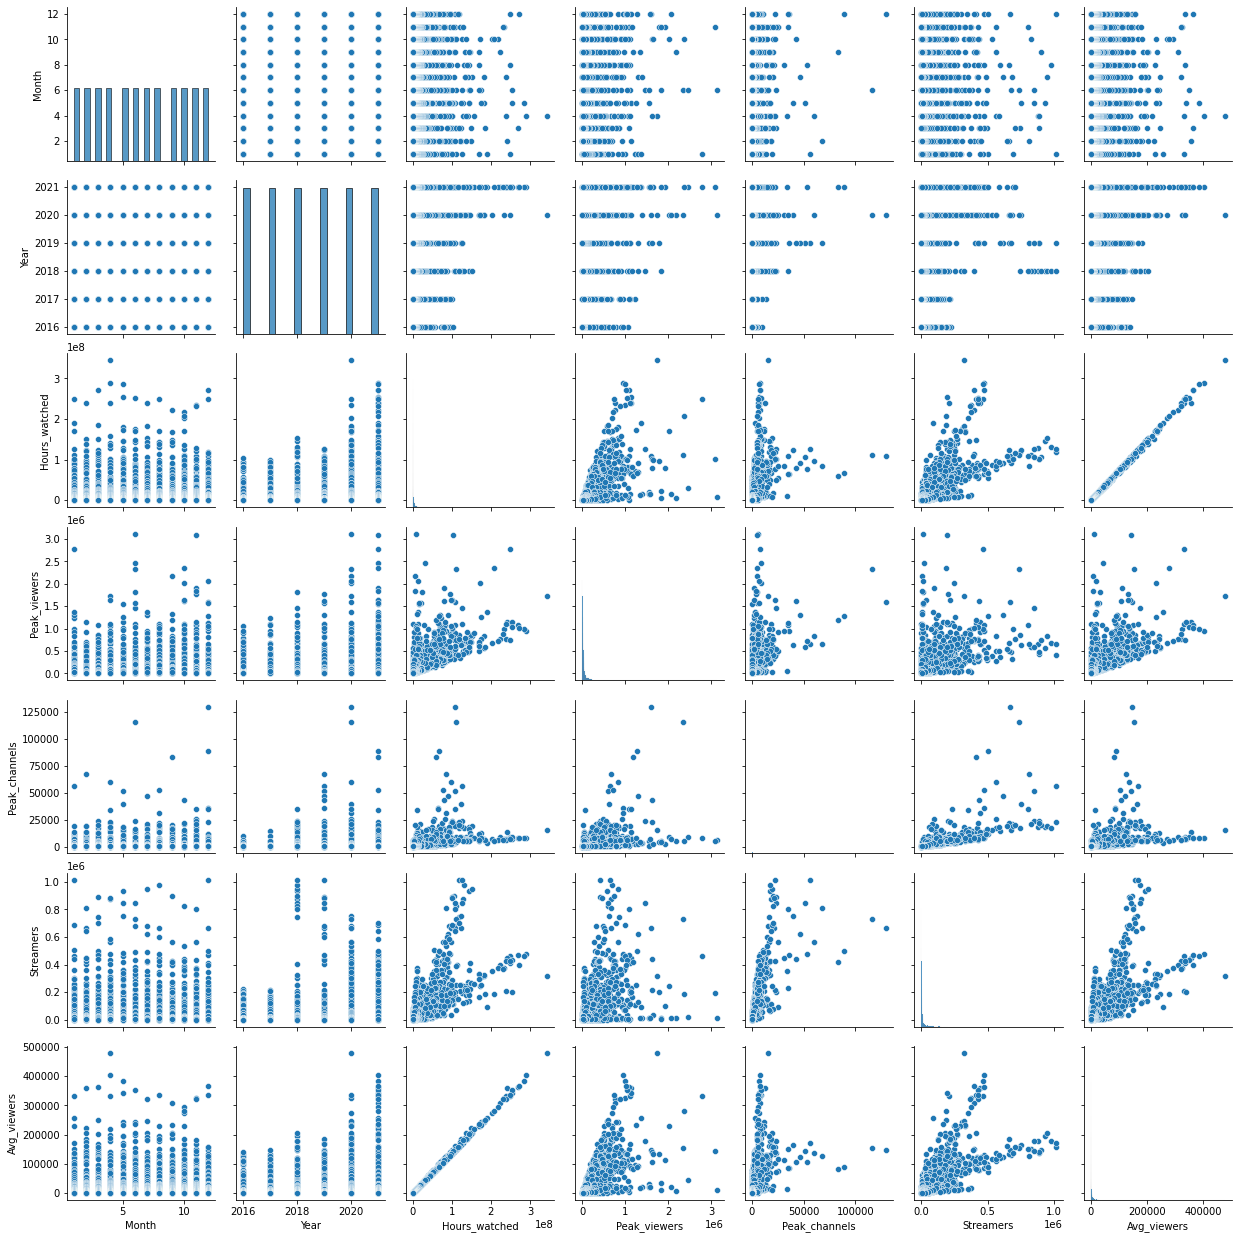

In [7]:
sns.pairplot(data.iloc[::, 2:-2])

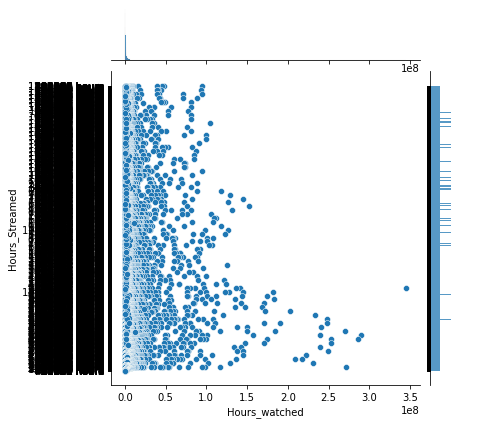

In [8]:
sns.jointplot(x='Hours_watched', y='Hours_Streamed', data=data)

<AxesSubplot:xlabel='Year', ylabel='Avg_viewer_ratio'>

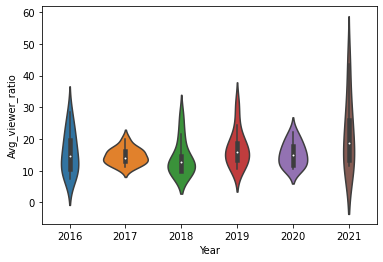

In [9]:
sns.violinplot(x='Year', y='Avg_viewer_ratio', data=data.loc[data['Game'] == 'Diablo III'])

<AxesSubplot:xlabel='Month', ylabel='Avg_viewer_ratio'>

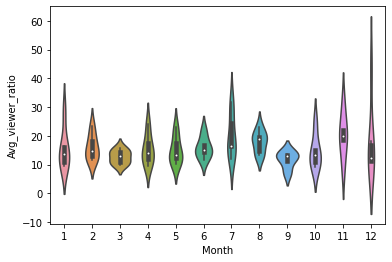

In [10]:
sns.violinplot(x='Month', y='Avg_viewer_ratio', data=data.loc[data['Game'] == 'Diablo III'])

<AxesSubplot:>

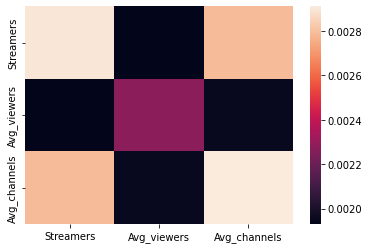

In [11]:
data_a = data.copy()

sns.heatmap(data.fillna(0).iloc[::,8:11].apply(lambda x: ((x - x.min())/(x.max() - x.min())), axis=0).cov())

4 Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

((array([-3.8998102 , -3.67951862, -3.55879512, ...,  3.55879512,
          3.67951862,  3.8998102 ]),
  array([1.950000e+00, 1.980000e+00, 2.270000e+00, ..., 1.078308e+04,
         1.145747e+04, 1.360187e+04])),
 (135.24793931754516, 81.87440277777775, 0.36656478680708726))

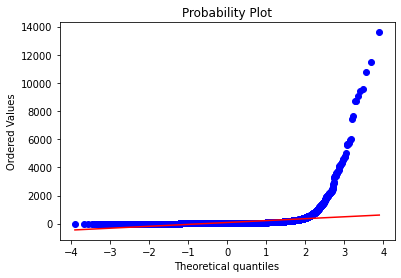

In [12]:
probplot(data['Avg_viewer_ratio'].fillna(0), dist="norm", plot=plt)

5 Построить любой график (связанный с вашими данными) с помощью plotly

In [13]:
px.histogram(data, x='Avg_viewer_ratio')

In [14]:
px.line(np.arange(0, 100)) 

In [15]:
px.histogram(data, x='Avg_viewer_ratio', y='Game', marginal="box")

In [16]:
px.imshow([[1, 30, 40],
           [30, 1, 70],
           [40, 70, 1]])